<a href="https://colab.research.google.com/github/Mstfayldz/Data-Science/blob/master/Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Missing Values in Feature Engineering

When working with real-world data, missing values are a common problem. In feature engineering, handling missing values correctly is crucial because they can affect the performance of machine learning models.

# Types of Missing Values

Missing values can be categorized into three main types:

# 1. Missing Completely at Random (MCAR)

* The missing values occur randomly and have no relationship with any other variable in the dataset.


*   Example: A person forgets to fill in their age in a survey.
*   Effect: No bias is introduced, and dropping missing values or imputing them with a simple method like mean/median is usually fine.




# 2. Missing at Random (MAR)





*  The missing values are related to other observed variables but not to the missing data itself.

*  Example: In a medical dataset, men are more likely to skip answering a question about weight, but within each gender, weight is missing randomly.
* Effect: More advanced imputation methods like regression or using related features to fill in the missing values can be useful.






# 3. Missing Not at Random (MNAR)



*   The missing values depend on the unobserved data itself, meaning the reason for missingness is not random.


*  Example: People with higher incomes may choose not to report their salaries in a survey.

*  Effect: This can introduce bias, and handling MNAR often requires domain knowledge or special techniques like modeling the missingness separately.






# Handling Missing Values in Feature Engineering

Once we identify the type of missing values, we can decide how to handle them:
# 1. Removing Missing Values (If Missing is Low)



*   If a feature has very few missing values (e.g., <5% of the dataset), simply removing those rows may not impact the model significantly.


*   Example:

df.dropna(inplace=True)
# 2. Imputation (Filling Missing Values)


*   Mean/Median/Mode Imputation: Replacing missing values with the mean (for numerical data), median (for skewed numerical data), or mode (for categorical data).

df['Age'].fillna(df['Age'].mean(), inplace=True)  # Mean Imputation


*   Forward or Backward Fill: Filling missing values using previous or next available values (good for time series data).

df.fillna(method='ffill', inplace=True)  # Forward fill

*   Predictive Imputation: Using models like regression or KNN to estimate missing values.

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df[['Age', 'Salary']] = imputer.fit_transform(df[['Age', 'Salary']])


# 3. Adding Missing Indicators




*   Instead of filling missing values, we can create a new column that flags whether a value was missing.

df['Age_missing'] = df['Age'].isnull().astype(int)


# 4. Using Domain Knowledge


*   In cases of MNAR, sometimes domain expertise can help us decide on the best approach.

*   Example: If missing income values indicate high salaries, we might group them as "high income" instead of just imputing with the mean.












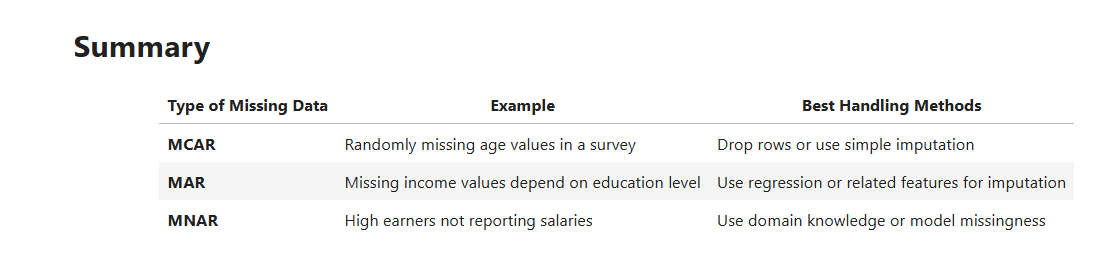

# Final Tip:
Before deciding how to handle missing values, always explore your data to understand the reason behind the missingness. Proper handling can significantly improve your machine learning model's accuracy!

In [28]:
import pandas as pd
import seaborn as sns

In [29]:
df=sns.load_dataset('titanic')

In [30]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [31]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [32]:
df.shape

(891, 15)

In [33]:
df.dropna().shape # eğer null olan rowları çıkarırsak datasetimiz çok kısalıyor

(182, 15)

In [34]:
df.dropna(axis=1).shape # burda da sadece 1 null değer içeriyorsa bile columnları kaldırır

(891, 11)

# Imputation
eksik veriyi kendimiz doldurmaya çalışırız

mean imputation ==> data normal dağılıma uygunsa mean koymak daha mantıklı ama çok fazla outlier varsa medyan kullanmak daha mantıklı

<Axes: ylabel='age'>

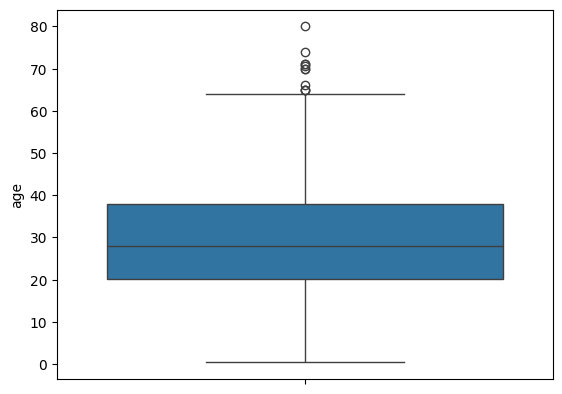

In [35]:
#outlier var mı varsa ne düzeyde bakmak için
sns.boxplot(df["age"])

<Axes: xlabel='age', ylabel='Count'>

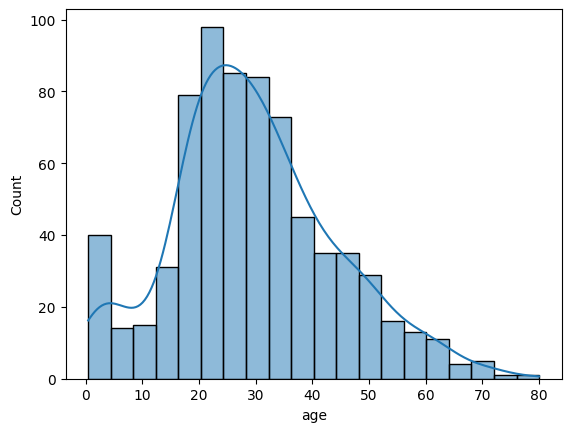

In [36]:
# eksik olan ve ekleme yaparak doldurulma yapılabilir mi diye bakacağız
sns.histplot(data=df["age"],kde=True)

In [37]:
df.age.mean()

np.float64(29.69911764705882)

In [38]:
df["age_new"]= df["age"].fillna(df.age.mean()) #boş olanların yerine mean değerini yazıp yeni bir column ekledik

In [39]:
df[["age_new","age"]]

,age_new,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [40]:
df.rename(columns={"age_new": "age_mean"}, inplace=True)

In [41]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000


median imputation ==> outlier değer fazla ise

In [46]:
df["age_median"]=df["age"].fillna(df["age"].median())

In [47]:
df[["age","age_mean","age_median"]]

,age,age_mean,age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


In [48]:
df.loc[888,["age","age_mean","age_median"]]

,888
age,NaN
age_mean,29.699118
age_median,28.0


mod imputation ==>categorize value

In [51]:
df[df["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [52]:
# df.drop(61, inplace=True)
#df.drop([61, 829], inplace=True)   yapılabilir  silmek için


In [54]:
df.embarked.unique() # değerler categorize edildiği için burda mod kullanmam gerekecek

array(['S', 'C', 'Q', nan], dtype=object)

In [59]:
mode_embarked=df[df["embarked"].notna()]["embarked"].mode()[0] # NAN değerler oldğu için notna() kullanmak mantıklı olur

In [60]:
mode_embarked

'S'

In [61]:
df["embarked_mode"]=df["embarked"].fillna(mode_embarked)

In [62]:
df["embarked_mode"]

,embarked_mode
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [64]:
df[["embarked","embarked_mode"]]

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C
